In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [8]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv', index_col=0)
df.index = pd.to_datetime(df.index).to_period('M')
df

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727
...,...
1975-08,858
1975-09,817
1975-10,827


In [10]:
y = df['Milk']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]

# Simple Exponential Smoothing

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


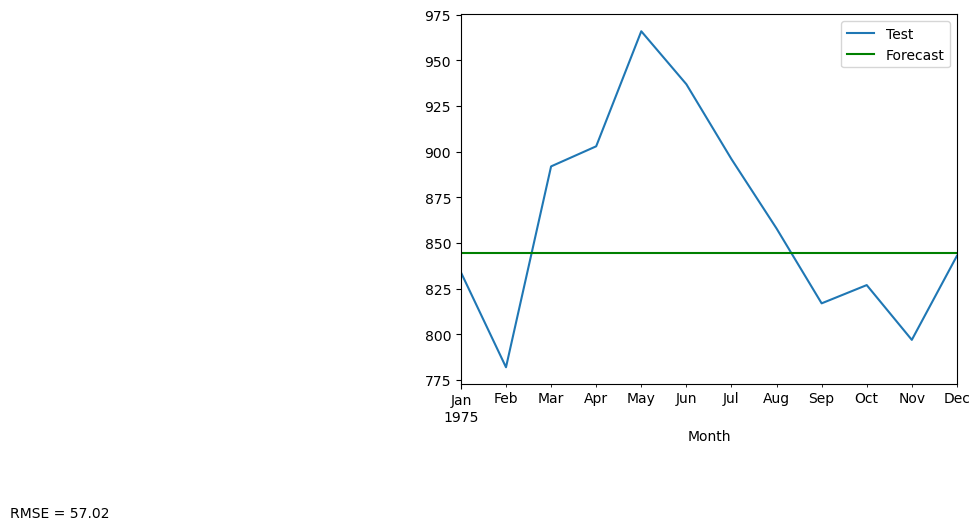

In [32]:
alpha = 0.1
ses = SimpleExpSmoothing(y_train)
model = ses.fit(smoothing_level=alpha)
fcast = model.forecast(len(y_test))
y_test.plot(label='Test')
fcast.plot(color = 'green', label='Forecast')
rmse = np.sqrt(mse(y_test , fcast))
plt.text(50, 700 , 'RMSE = ' + str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

In [36]:
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
#Holts Linear trend 
#This method is used when the data shows a linear trend (either increasing or decreasing), but no seasonality.

# Holts Linear Trend Method 

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


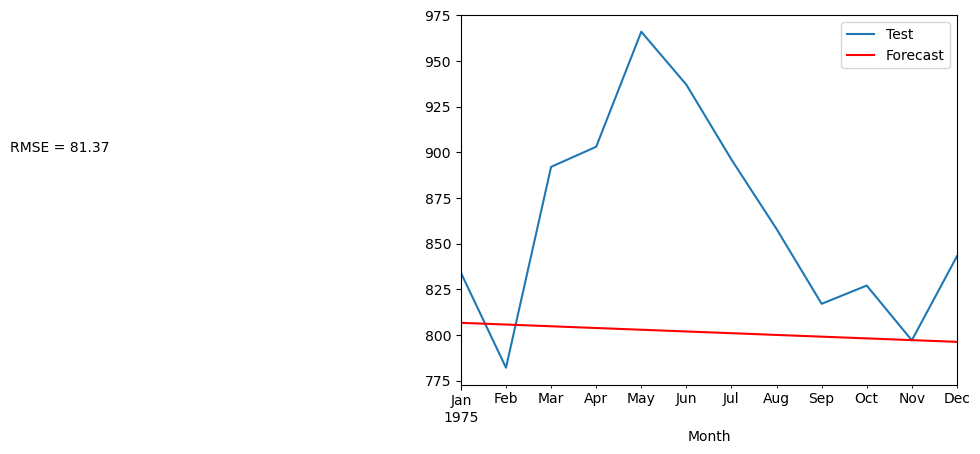

In [75]:
alpha, beta = 0.5,0.02
holt = Holt(y_train)
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
plt.text(50,900,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')

## Exponential Trend Method 

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


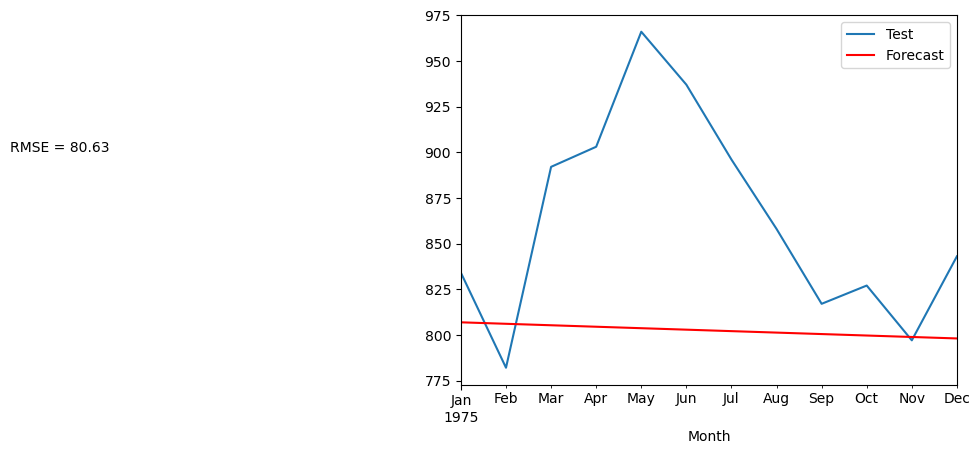

In [121]:
alpha, beta = 0.5,0.02
holt = Holt(y_train, exponential=True)
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
plt.text(50,900,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')

In [123]:
fit1.params 

{'smoothing_level': 0.5,
 'smoothing_trend': 0.02,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 589.0,
 'initial_trend': 0.9524617996604414,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Additive Damping trend Method 

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


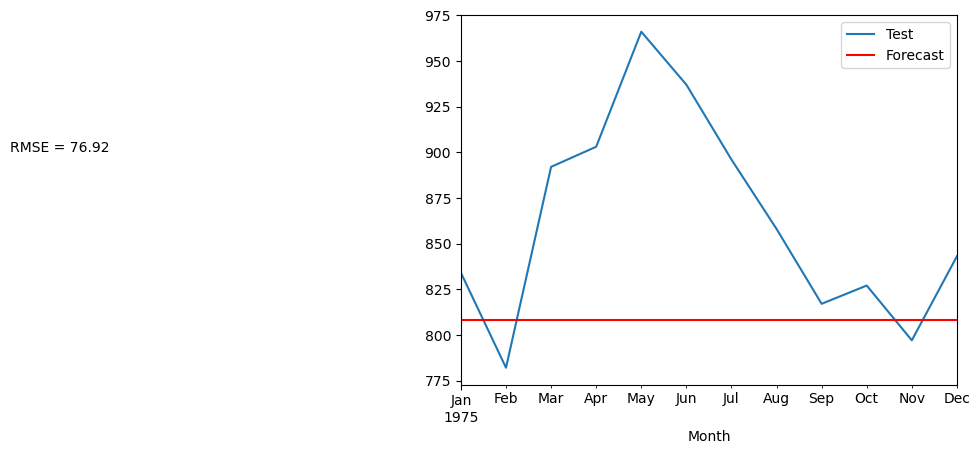

In [126]:
alpha, beta , phi = 0.5,0.02, 0.01
holt = Holt(y_train, exponential=False, damped_trend=True)
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta, damping_trend=phi)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
plt.text(50,900,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')

## Multiplicative Damping trend Method

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


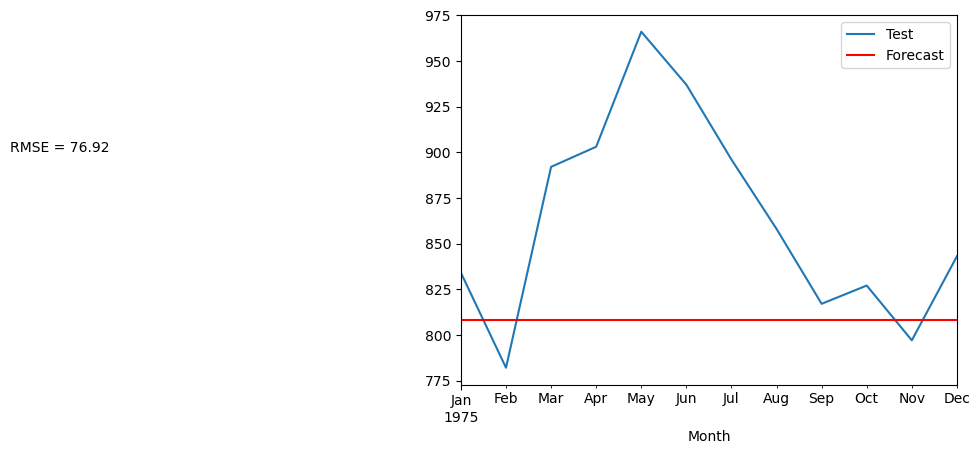

In [129]:
alpha, beta , phi = 0.5,0.02, 0.01
holt = Holt(y_train, exponential=True, damped_trend=True)
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta, damping_trend=phi)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
plt.text(50,900,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')

## Holt-Winters Additive Method 
it will consider both trends and Seasonality Component.

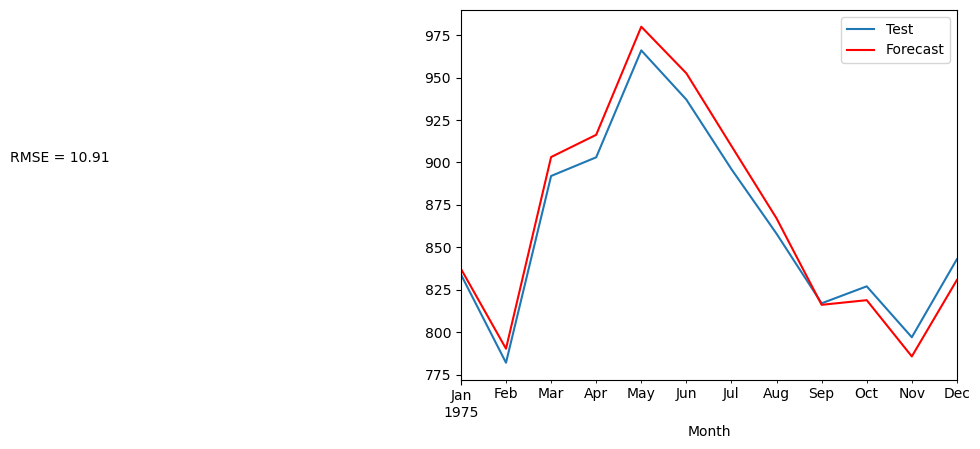

In [146]:
alpha, beta , gamma = 0.5,0.02, 0.6
ex = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add' , seasonal='add')
fit1 = ex.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
plt.text(50,900,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')

In [138]:
fit1.params

{'smoothing_level': 0.6987207053002673,
 'smoothing_trend': 1.7534284305735402e-09,
 'smoothing_seasonal': 0.2120132495278195,
 'damping_trend': nan,
 'initial_level': 607.5086376803255,
 'initial_trend': 1.6172718728483748,
 'initial_seasons': array([-20.26493659, -49.42228186,  34.92892148,  49.33233044,
        114.42060334,  87.94148088,  30.32744049, -17.58637137,
        -58.15788957, -55.3287753 , -78.77666047, -44.01117648]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Holt-Winters Multiplicative Method 

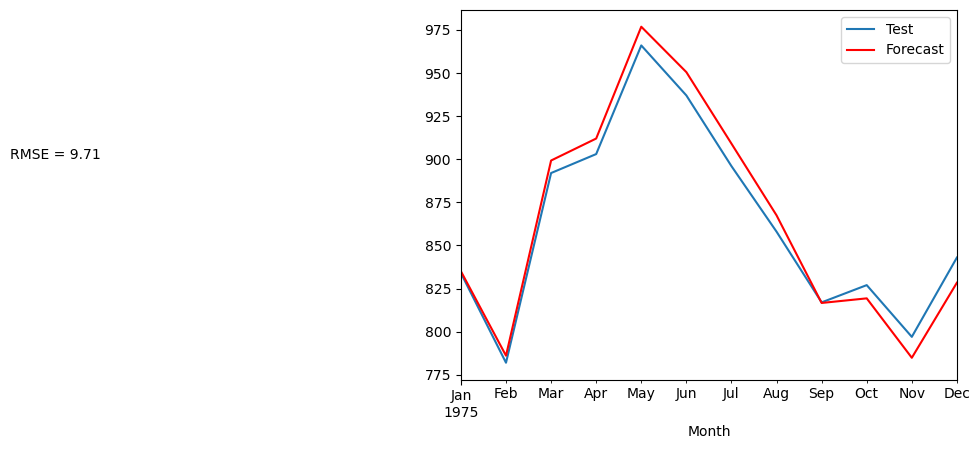

In [144]:
## with seasonal multiplicative
alpha, beta , gamma = 0.5,0.02, 0.6
ex = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add' , seasonal='mul')
fit1 = ex.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
plt.text(50,900,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')